In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv data into pandas dataframe

In [198]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

First 10 rows from the data-set for spot checking

In [199]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Slice by age
We slice by age and look at survival rates

## P.S : Look at the legend closely.
Female survival rates are very high

Text(0.5,1,'Survival plot for sex = female(total=314)')

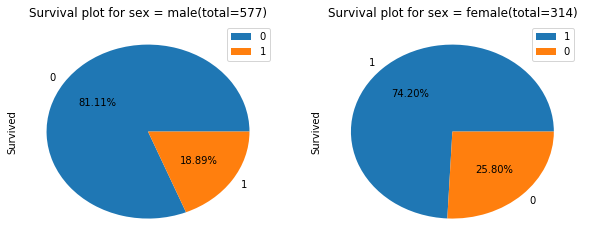

In [214]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
#df_train
male_slice = df_train.Survived[df_train['Sex'] == 'male'].value_counts()
male_slice.plot(kind='pie',autopct='%0.2f%%', legend=True)
plt.title("Survival plot for sex = male(total={})".format(male_slice.sum()))
fig.add_subplot(122)
female_slice = df_train.Survived[df_train['Sex'] == 'female'].value_counts()
female_slice.plot(kind='pie',autopct='%0.2f%%', legend=True)
plt.title("Survival plot for sex = female(total={})".format(female_slice.sum()))

# Extract titles and fill age
We extract titles and fill median age and also analyze the titles

In [215]:
df_train['Title'] = df_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = df_train['Title'].unique()
titles

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Dr', 'Rev', 'Jonkheer',
       'Capt', 'Col', 'Don', 'Mlle', 'the Countess', 'Ms', 'Mme', 'Sir',
       'Lady'], dtype=object)

In [216]:
df_test['Title'] = df_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles_test = df_test['Title'].unique()
titles_test

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [217]:
df_train['Age'].fillna(-1, inplace=True)
df_test['Age'].fillna(-1, inplace=True)

median_age_for_title = dict()
counts_for_title = dict()
for title in titles:
    median = df_train.Age[(df_train["Age"] != -1) & (df_train['Title'] == title)].median()
    median_age_for_title[title] = median
    counts_for_title[title] = df_train.Title[df_train['Title'] == title].count()

In [218]:
median_age_for_title_filtered = {k:v for (k, v) in median_age_for_title.items() if counts_for_title[k]>=3}
median_age_for_title_filtered

{'Dr': 46.5, 'Master': 3.5, 'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'Rev': 46.5}

In [219]:
for index, row in df_train.iterrows():
    if row['Age'] == -1:
        if median_age_for_title_filtered.has_key(row['Title']):
            df_train.loc[index, 'Age'] = median_age_for_title_filtered[row['Title']]
        else:
            df_train.loc[index, 'Age'] = 28

In [220]:
for index, row in df_test.iterrows():
    if row['Age'] == -1:
        if median_age_for_title_filtered.has_key(row['Title']):
            df_test.loc[index, 'Age'] = median_age_for_title_filtered[row['Title']]
        else:
            df_test.loc[index, 'Age'] = 28

# Slice by Title
Now we look at the title of the person and slice them.

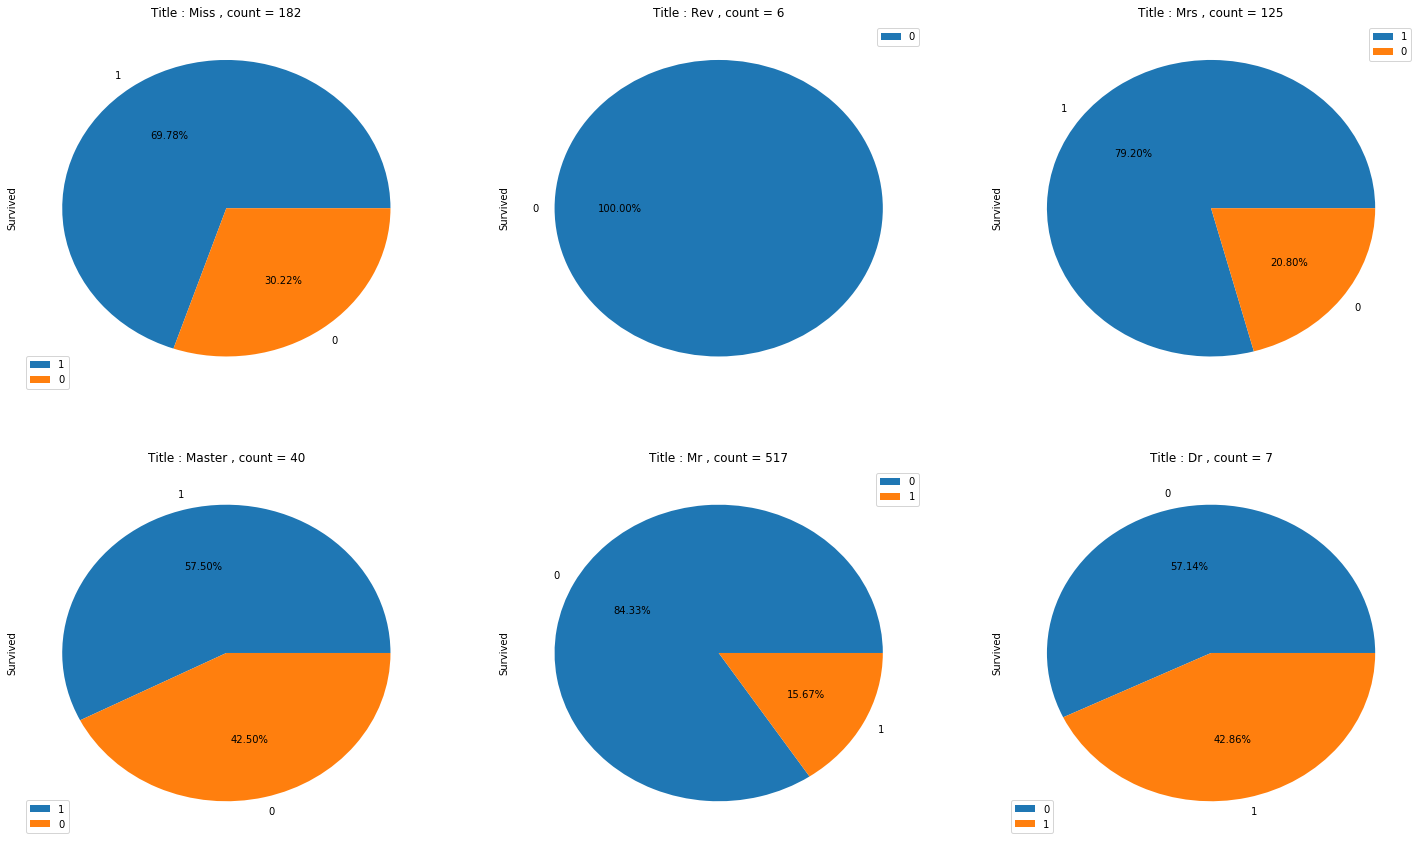

In [221]:
df_train= df_train.sort_values(['Survived'])
fig = plt.figure(figsize=(25,15))

i=1
for title in median_age_for_title_filtered.keys():
    fig.add_subplot(2, 3, i)
    slice_for_title = df_train.Survived[df_train['Title'] == title].value_counts()
    plt.title('Title : {} , count = {}'.format(title, slice_for_title.sum()))
    df_train.Survived[df_train['Title'] == title].value_counts().plot(kind='pie', autopct='%0.2f%%', legend=True)
    #, colors=['r', 'g'])
    i += 1

Text(0.5,1,'Title slice for survival = 1 (total=342)')

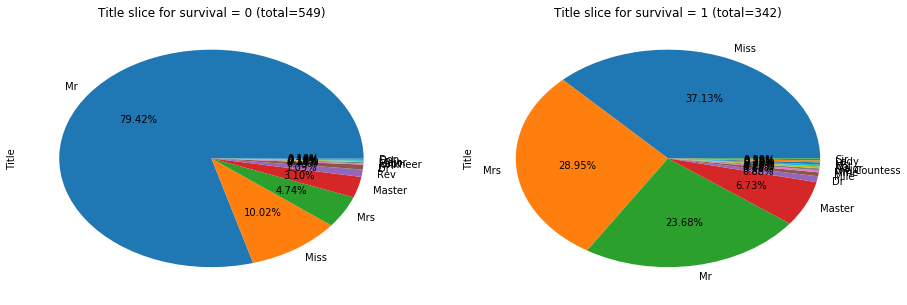

In [222]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
non_survived_slice = df_train.Title[df_train['Survived'] == 0].value_counts()
non_survived_slice.plot(kind='pie',autopct='%0.2f%%')
plt.title("Title slice for survival = 0 (total={})".format(non_survived_slice.sum()))
fig.add_subplot(122)
survived_slice = df_train.Title[df_train['Survived'] == 1].value_counts()
survived_slice.plot(kind='pie',autopct='%0.2f%%')
plt.title("Title slice for survival = 1 (total={})".format(survived_slice.sum()))

# Median Fare
It is interesting to note that median fare of people who
survived is higher than median fare of people who didn't survive

In [166]:
df_train.Fare[df_train['Survived']==0].median()

10.5

In [167]:
df_train.Fare[df_train['Survived']==1].median()

26.0

# Scatter plot Age, Fare, Sex
Now we draw scatter plots of (Age, Fare) and we mark them on different
colors based on the combinaton of (Sex, Survived). There are some interesting patterns there.

/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


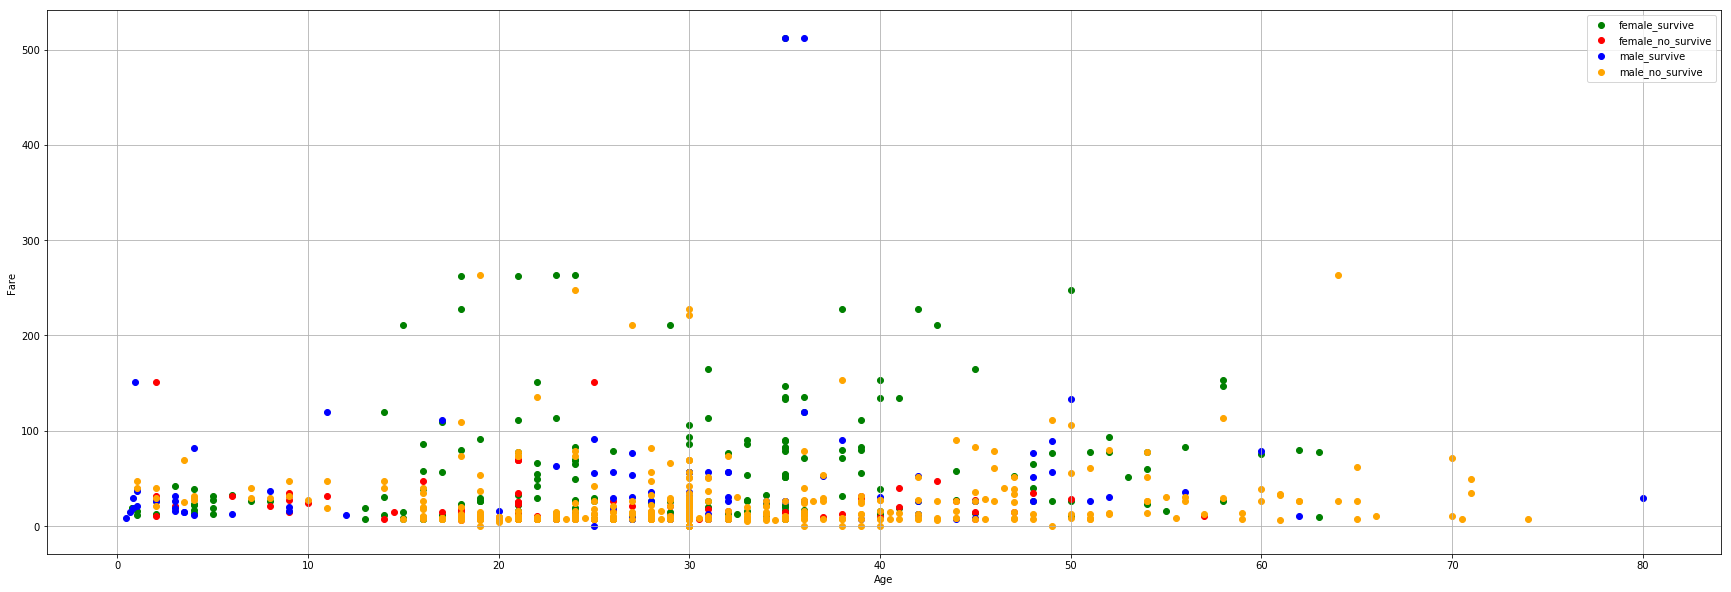

In [223]:
plt.figure(figsize=(30, 10))
ax = plt.subplot()

ax.scatter(df_train[df_train['Survived'] == 1][df_train['Sex'] == 'female']['Age'], df_train[df_train['Survived'] == 1][df_train['Sex'] == 'female']['Fare'], 
           c='green')
#, s=df_train[df_train['Survived'] == 1][df_train['Sex'] == 'female']['Fare'])
ax.scatter(df_train[df_train['Survived'] == 0][df_train['Sex'] == 'female']['Age'], df_train[df_train['Survived'] == 0][df_train['Sex'] == 'female']['Fare'], 
           c='red')
#, s=df_train[df_train['Survived'] == 0][df_train['Sex'] == 'female']['Fare']);
ax.scatter(df_train[df_train['Survived'] == 1][df_train['Sex'] == 'male']['Age'], df_train[df_train['Survived'] == 1][df_train['Sex'] == 'male']['Fare'], 
           c='blue')
#, s=df_train[df_train['Survived'] == 1][df_train['Sex'] == 'male']['Fare'])
ax.scatter(df_train[df_train['Survived'] == 0][df_train['Sex'] == 'male']['Age'], df_train[df_train['Survived'] == 0][df_train['Sex'] == 'male']['Fare'], 
           c='orange')
#, s=df_train[df_train['Survived'] == 0][df_train['Sex'] == 'male']['Fare']);
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["female_survive", "female_no_survive", "male_survive", "male_no_survive"])
plt.grid(True)


# Random checks on slices
Now we apply some manual slice/filter and check the value counts
to get a feel of the data.

In [224]:
df_train[df_train['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [225]:
df_train[df_train['Sex'] == 'female'][df_train['Parch']==0][df_train['SibSp']==0]['Survived'].value_counts()

/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    99
0    27
Name: Survived, dtype: int64

In [226]:
df_train[df_train['Sex'] == 'female'][df_train['Parch']>=1]['Survived'].value_counts()

/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    80
0    40
Name: Survived, dtype: int64

In [227]:
df_train[df_train['Sex'] == 'female'][df_train['SibSp']>=1]['Survived'].value_counts()

/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    96
0    44
Name: Survived, dtype: int64

In [228]:
df_train[df_train['Sex'] == 'female'][df_train['SibSp']>=1][df_train['Parch']>=1]['Survived'].value_counts()

/Users/jaisongeorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    42
0    30
Name: Survived, dtype: int64